


*   all variables names should follow camel casing eg. trainData, valData
*   all method names should have first letter caps for each word


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

1.   Load data from shared directory folder
2.   Perform minial pre-processing required before data exploration



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/GSU/sem 1/data programming/bankruptcy detection/dataset/data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
print("number of rows with null or missing value",data.shape[0]-data.dropna().shape[0])

number of rows with null or missing value 0


# Data Exploratory Analysis

1.   Total number of records ,Plot output class histrogram
2.   Print data types of all colums. check how many are numerical and how many are categorical
3.   Check if any colum needs preprocessing
4.   Relation between some/all features and target variables.





0    6599
1     220
Name: Bankrupt?, dtype: int64


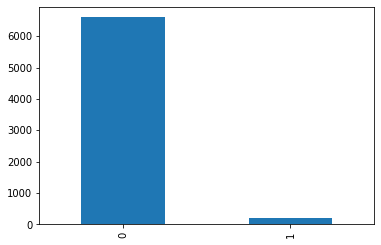

In [ ]:
print(data['Bankrupt?'].value_counts())
data['Bankrupt?'].value_counts().plot(kind='bar')

In [ ]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [ ]:
data.dtypes.value_counts()

float64    93
int64       3
dtype: int64

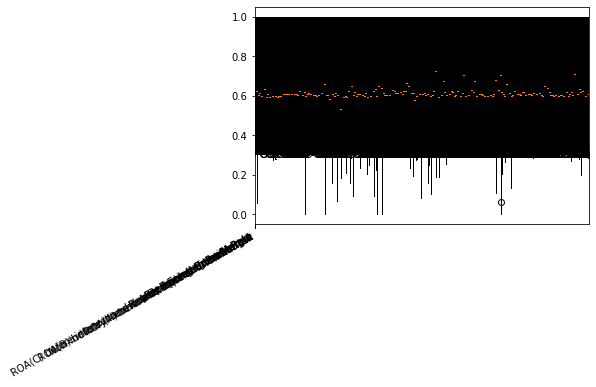

In [ ]:
plt.boxplot(data.iloc[:,1:10])
plt.xticks(np.arange(1, 10 + 1),
           data.columns, rotation=30, ha="right");

In [ ]:
PearsonCorr = data.corr(method ='pearson')
PearsonCorr.style.background_gradient(cmap='coolwarm')

In [ ]:
def ScatterPlot(x,y,xLable='',yLable='',title='',label=''):
    # reducing the dimensions to plot the data points in two dimensions
    pca = PCA(n_components=2)
    pca.fit(x)
    x = pca.transform(x)
    plt.title(title)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7,label=label)
    plt.show()
# ScatterPlot(data.iloc[:,1:],data['Bankrupt?'])

# Data Splitting


1.   Split the data into 70/30 or 80/20 ratio
2.   List item



In [ ]:
trainX, testX, trainY, testY = train_test_split(data.iloc[:,1:], data['Bankrupt?'], test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(trainY)}")
print(f"Testing target statistics: {Counter(testY)}")

Training target statistics: Counter({0: 5282, 1: 173})
Testing target statistics: Counter({0: 1317, 1: 47})


# Data Preprocessing



1.   perform scaling if required
1.   Try different methods for data balancing
2.   Undersampling
3.   Over sampling
4.   SMOTE
5.   save each sampled dataset in trainingData dictionary



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
def Balancing(trainX,trainY):
    ScatterPlot(trainX,trainY,title='Original training data')
    #oversampleing
    overSampler = RandomOverSampler(random_state=42)
    overSampleTrainX, overSampleTrainY = overSampler.fit_resample(trainX, trainY)
    print(f"Training target statistics: {Counter(overSampleTrainY)}")
    ScatterPlot(overSampleTrainX,overSampleTrainY,title='Over sampled training data')

    #undersampling
    underSampler = RandomUnderSampler(random_state=42)
    underSampleTrainX, underSampleTrainY = underSampler.fit_resample(trainX,trainY)
    print(f"Training target statistics: {Counter(underSampleTrainY)}")
    ScatterPlot(underSampleTrainX,underSampleTrainY,title='Under sampled training data')
    #smote
    #grid search to find the best neighbor
    smoteSampler = SMOTE(random_state=42, k_neighbors=3)
    smoteTrainX, smoteTrainY = smoteSampler.fit_resample(trainX,trainY)
    print(f"Training target statistics: {Counter(smoteTrainY)}")
    ScatterPlot(smoteTrainX,smoteTrainY,title='Smote sampled training data')

    return {'Original Data': [trainX,trainY],'Over Sampled Data':[overSampleTrainX,overSampleTrainY],'Under Sampled Data':[underSampleTrainX,underSampleTrainY],'Smote Sampled Data':[smoteTrainX,smoteTrainY]}


# trainingData = Balancing(trainX,trainY)
# trainingData['originalData'] = [trainX,trainY]

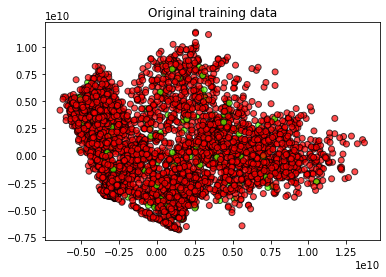

Training target statistics: Counter({0: 5282, 1: 5282})


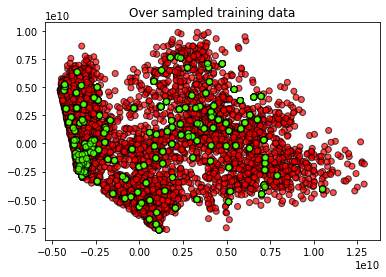

Training target statistics: Counter({0: 173, 1: 173})


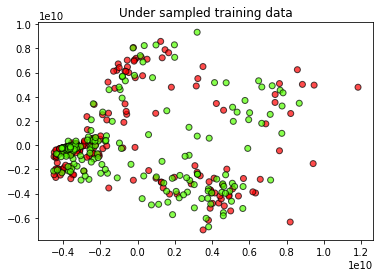

Training target statistics: Counter({0: 5282, 1: 5282})


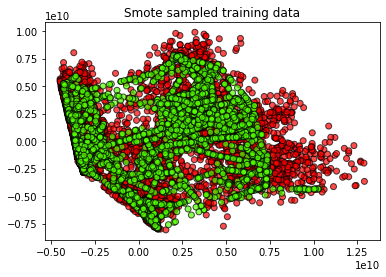

In [ ]:
#global variables
trainingData = {}
predictedY = {}
trainingData = Balancing(trainX,trainY)

# Dimensionality Reduction


1.   PCA
 



In [ ]:
def DimReduction():
    tempDic = {}
    global testX
    for key in trainingData:
        # print(key)
        trainX = trainingData[key][0]
        trainY = trainingData[key][1]
        pca = PCA(n_components = 0.99)
        pca.fit(trainX)
        reducedTrainX = pca.transform(trainX)
        reducedTestX = pca.transform(testX)
        # print(reducedTrainX.shape,trainY.shape,reducedTestX.shape)
        tempDic[key+' with PCA reduction'] = [reducedTrainX,trainY,reducedTestX]
    trainingData.update(tempDic)
    for key in trainingData:
        print(key)
        for item in trainingData[key]:
            print(item.shape)
DimReduction()

Original Data
(5455, 95)
(5455,)
Over Sampled Data
(10564, 95)
(10564,)
Under Sampled Data
(346, 95)
(346,)
Smote Sampled Data
(10564, 95)
(10564,)
Original Data with PCA reduction
(5455, 11)
(5455,)
(1364, 11)
Over Sampled Data with PCA reduction
(10564, 14)
(10564,)
(1364, 14)
Under Sampled Data with PCA reduction
(346, 14)
(346,)
(1364, 14)
Smote Sampled Data with PCA reduction
(10564, 12)
(10564,)
(1364, 12)


# Model Training


1.   Define a method with model name eg. SVMModel(trainX,trainY,testX)
2.   method should take trainX and trainY and testX/valX as input
3.   it should return predictedY 



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.utils import class_weight

In [ ]:
def LogisticRegressionModel(trainX,trainY,key,testX=testX):
    print(trainX.shape,trainY.shape,testX.shape)
    if key == 'Original Data':
        weights = {0:1, 1:100}
    else:
        weights = {0:1, 1:1}
    model = LogisticRegression(random_state=42)
    score = cross_validate(model, trainX, trainY , cv=10)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    predYScore = model.predict_proba(testX)[::,1]
    # print(predY)
    predictedY['Logistic Regression on '+key]=[testY,predY,predYScore]

# LogisticRegressionModel(trainX,trainY,'Orginial Data')

In [ ]:
def NaiveBayesModel(trainX,trainY,key,testX=testX):
    model = GaussianNB()
    score = cross_validate(model, trainX, trainY , cv=10)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    predYScore = model.predict_proba(testX)[::,1]
    predictedY['Naive Bayes on '+key]=[testY,predY,predYScore]
# NaiveBayesModel(trainX,trainY,'Orginial Data')   

In [ ]:
def RandomForestModel(trainX,trainY,key,testX=testX):
    if key == 'Original Data':
        weights = {0:1, 1:100}
    else:
        weights = {0:1, 1:1}
    model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,class_weight=weights) 
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    predYScore = model.predict_proba(testX)[::,1]
    predictedY['Random Forest:'+key]=[testY,predY,predYScore]

# RandomForestModel(trainX,trainY,'Orginial Data')

In [ ]:
def SVMModel(trainX,trainY,key,testX=testX):
    if key == 'Original Data':
        weights = {0:1, 1:100}
    else:
        weights = {0:1, 1:1}
    model = SVC(kernel= 'linear', random_state=42, C=0.1,class_weight=weights)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    predYScore = model.predict_proba(testX)[::,1]
    predictedY['SVM on '+key]=[testY,predY,predYScore]

# SVMModel(trainX,trainY,'Orginial Data')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
def NeuralNetworkModel(X,Y,key,testX=testX):
    # print(X.shape,Y.shape)
    X = np.array(X)
    Y = np.array(Y)
    model = Sequential()
    if "PCA" in key:
        model.add(Dense(8, input_shape=(X.shape[1],), activation='relu',kernel_initializer='he_uniform')) # Add an input shape! (features,)
        model.add(Dense(4, activation='relu'))
        # model.add(Dense(4, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(16, input_shape=(X.shape[1],), activation='relu',kernel_initializer='he_uniform')) # Add an input shape! (features,)
        model.add(Dense(16, activation='relu'))
        # model.add(Dense(4, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    # model.summary() 

    # compile the model
    model.compile(optimizer='Adam', 
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # early stopping callback
    # This callback will stop the training when there is no improvement in  
    # the validation loss for 10 consecutive epochs.  
    # es = EarlyStopping(monitor='val_accuracy', 
    #                                 mode='max', # don't minimize the accuracy!
    #                                 patience=10,
    #                                 restore_best_weights=True)

    if key == 'Original Data':
        weights = {0:1, 1:100}
    else:
        weights = {0:1, 1:1}
    history = model.fit(X,
                        Y,
                        # callbacks=[es],
                        epochs=80, # you can set this to a big number!
                        batch_size=500,
                        class_weight=weights,
                        validation_split=0.3,
                        shuffle=True,
                        verbose=0)
    testX = np.array(testX)
    predY = np.round(model.predict(testX),0)
    predictedY['Neural Network on '+key]=[testY,predY]

# NeuralNetworkModel(trainX,trainY,'Orginial Data')

In [ ]:
models={
    'Logistic Regression':LogisticRegressionModel,
    'Naive Bayes':NaiveBayesModel,
    # 'SVM':SVMModel,
    'Random Forest':RandomForestModel,
    'Neural Network':NeuralNetworkModel
    
}

In [ ]:
def ModelTraining():
    for model in models:
        for key in trainingData:
            trainX,trainY=trainingData[key][0],trainingData[key][1]
            # if model=='SVM':
            print("Training",model,"on",key)
            if "PCA" in str(key):
                reducedTestX = trainingData[key][2]
                models[model](trainX,trainY,key,reducedTestX)
            else:
                models[model](trainX,trainY,key)

ModelTraining()

Training Logistic Regression on Original Data
(5455, 95) (5455,) (1364, 95)
Training Logistic Regression on Over Sampled Data
(10564, 95) (10564,) (1364, 95)
Training Logistic Regression on Under Sampled Data
(346, 95) (346,) (1364, 95)
Training Logistic Regression on Smote Sampled Data
(10564, 95) (10564,) (1364, 95)
Training Logistic Regression on Original Data with PCA reduction
(5455, 11) (5455,) (1364, 11)
Training Logistic Regression on Over Sampled Data with PCA reduction
(10564, 14) (10564,) (1364, 14)
Training Logistic Regression on Under Sampled Data with PCA reduction
(346, 14) (346,) (1364, 14)
Training Logistic Regression on Smote Sampled Data with PCA reduction
(10564, 12) (10564,) (1364, 12)
Training Naive Bayes on Original Data
Training Naive Bayes on Over Sampled Data
Training Naive Bayes on Under Sampled Data
Training Naive Bayes on Smote Sampled Data
Training Naive Bayes on Original Data with PCA reduction
Training Naive Bayes on Over Sampled Data with PCA reduction


# Performance Analysis


1.   Define a method called PerformanceAnalysis()
2.   it will take two parameters called testY, predictedY
3.   it should print various performance metrices



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn import metrics

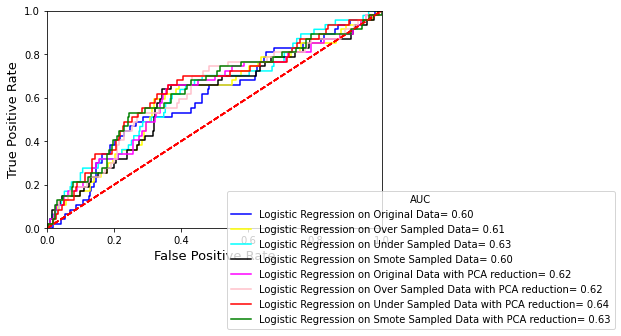

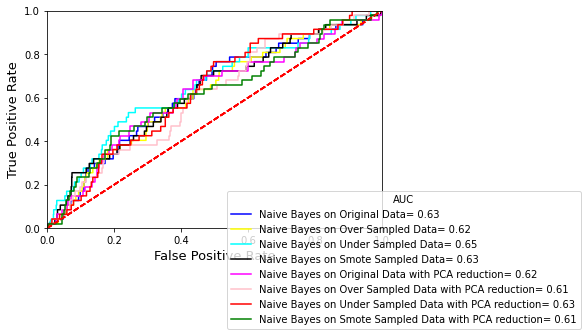

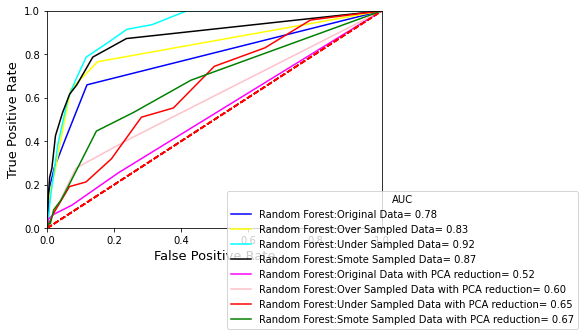

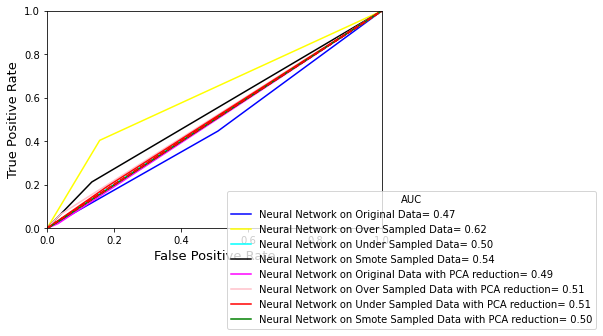

In [ ]:
def RocCurve(predictedY):
    count = 1
    colors = ['red', 'green', 'blue', 'yellow','cyan','black','magenta','pink']
    for key in predictedY:
        # print(key)
        testY = predictedY[key][0]
        predY = predictedY[key][2] if len(predictedY[key])==3 else predictedY[key][1]
        fpr, tpr, threshold = metrics.roc_curve(testY, predY)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, 'b', label = key+'= %0.2f' % roc_auc,color=colors[int((count+1)%8)])
        plt.legend(loc = 'upper left',borderaxespad=18, title='AUC')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate',fontsize=13)
        plt.xlabel('False Positive Rate',fontsize=13)
        if count%8==0:
            # print("here")
            plt.show()
        count+=1
RocCurve(predictedY)            

Logistic Regression on Original Data


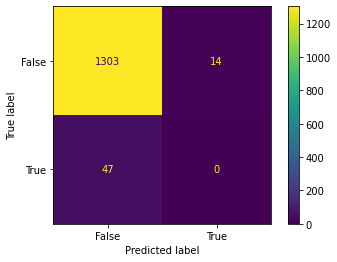

Logistic Regression on Over Sampled Data


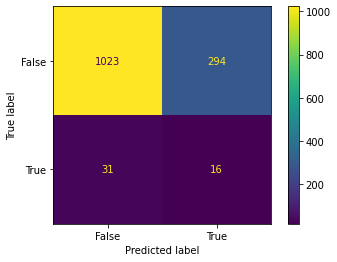

Logistic Regression on Under Sampled Data


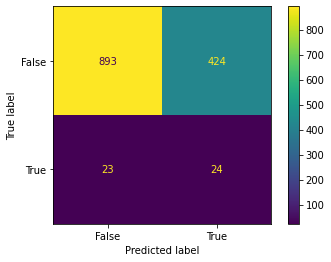

Logistic Regression on Smote Sampled Data


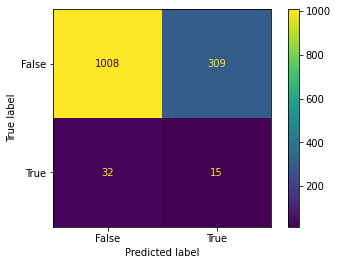

Logistic Regression on Original Data with PCA reduction


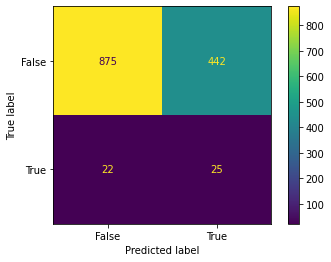

Logistic Regression on Over Sampled Data with PCA reduction


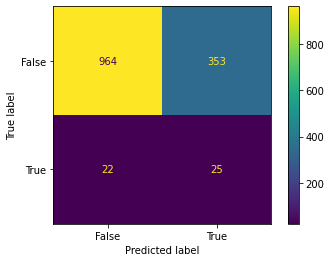

Logistic Regression on Under Sampled Data with PCA reduction


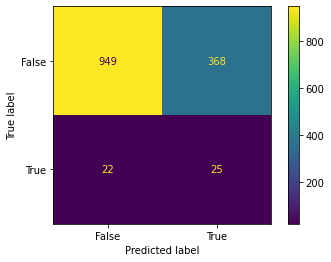

Logistic Regression on Smote Sampled Data with PCA reduction


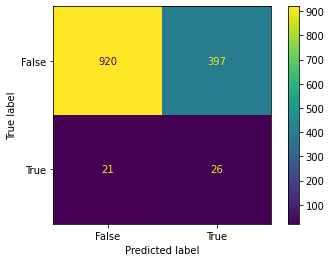

Naive Bayes on Original Data


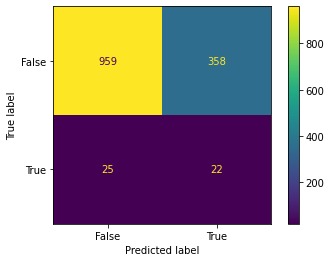

Naive Bayes on Over Sampled Data


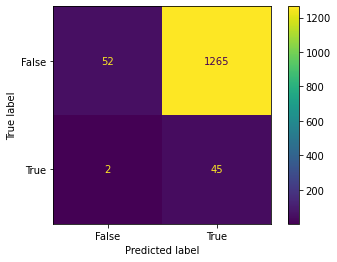

Naive Bayes on Under Sampled Data


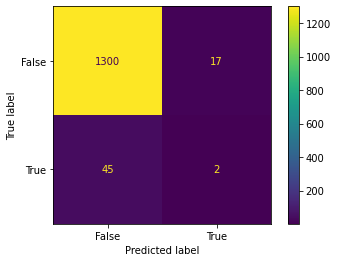

Naive Bayes on Smote Sampled Data


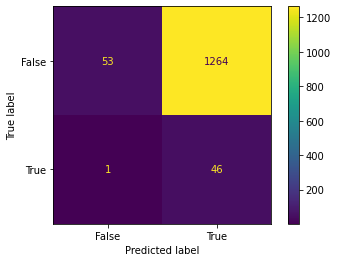

Naive Bayes on Original Data with PCA reduction


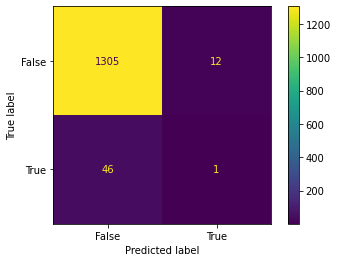

Naive Bayes on Over Sampled Data with PCA reduction


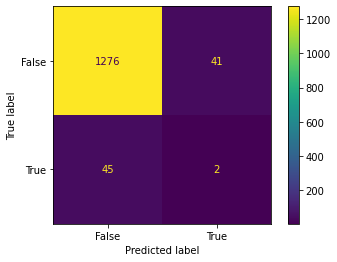

Naive Bayes on Under Sampled Data with PCA reduction


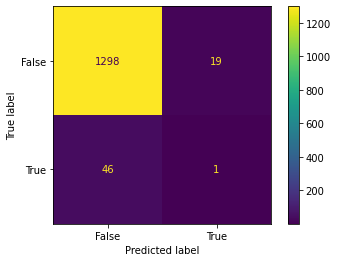

Naive Bayes on Smote Sampled Data with PCA reduction


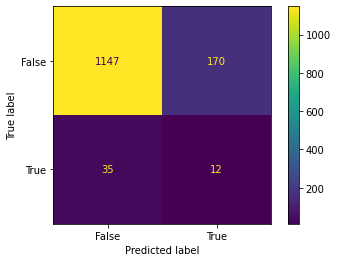

Random Forest:Original Data


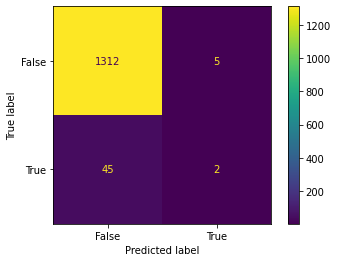

Random Forest:Over Sampled Data


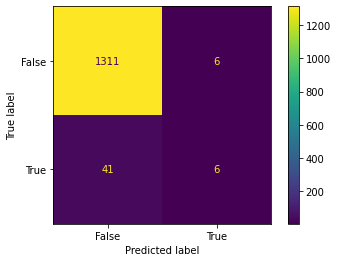

Random Forest:Under Sampled Data


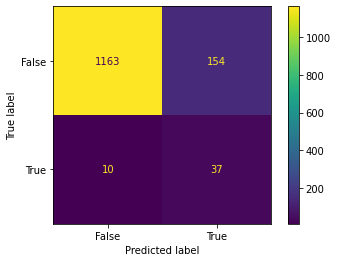

Random Forest:Smote Sampled Data


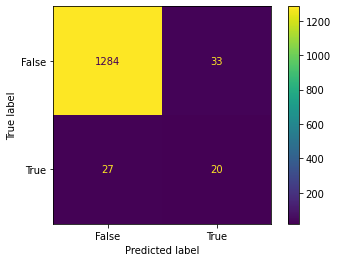

Random Forest:Original Data with PCA reduction


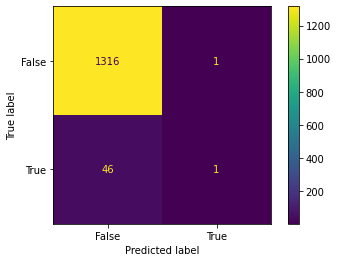

Random Forest:Over Sampled Data with PCA reduction


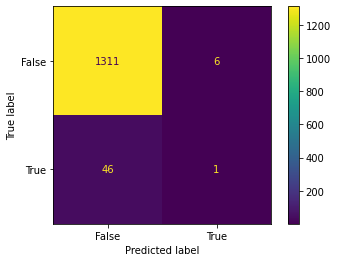

Random Forest:Under Sampled Data with PCA reduction


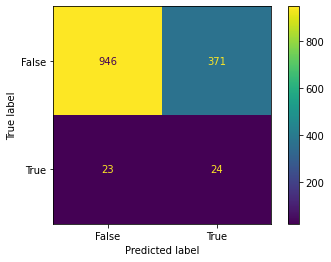

Random Forest:Smote Sampled Data with PCA reduction


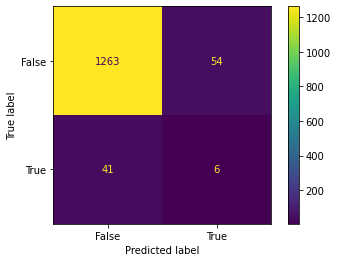

Neural Network on Original Data


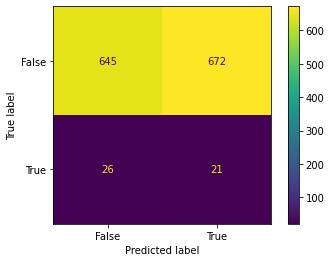

Neural Network on Over Sampled Data


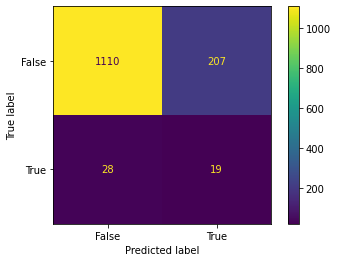

Neural Network on Under Sampled Data


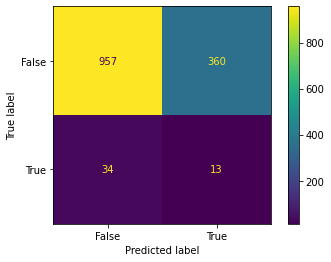

Neural Network on Smote Sampled Data


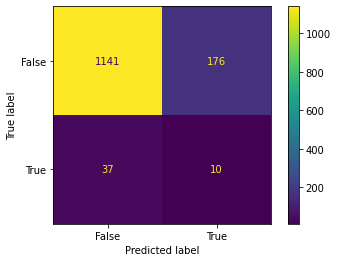

Neural Network on Original Data with PCA reduction


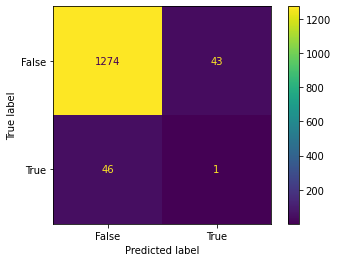

Neural Network on Over Sampled Data with PCA reduction


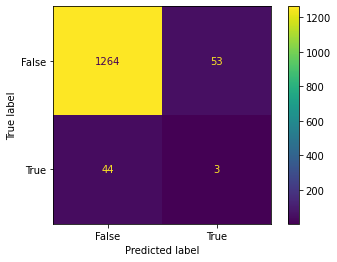

Neural Network on Under Sampled Data with PCA reduction


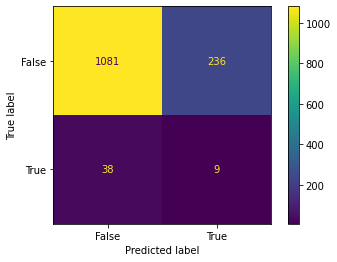

Neural Network on Smote Sampled Data with PCA reduction


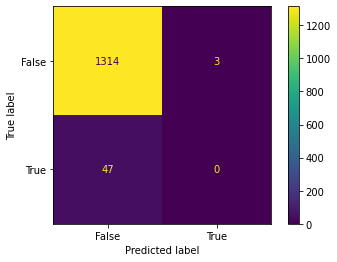

In [ ]:
def PerformanceAnalysis(predictedY):
    for key in predictedY:
        print(key)
        testY = predictedY[key][0]
        predY = predictedY[key][1]
        # print('Precision score %s' % precision_score(testY, predY))
        # print('Recall score %s' % recall_score(testY, predY))
        # print('F1-score score %s' % f1_score(testY, predY))
        # print('Accuracy score %s' % accuracy_score(testY, predY))
        confusion_matrix = metrics.confusion_matrix(testY, predY)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.show()
        resultDf.append(
        {
            'Key' : key, 'Precision Score' : precision_score(testY, predY) , 'Recall score' :  recall_score(testY, predY) , 'F1 score' :  f1_score(testY, predY) ,'Accuracy score' : accuracy_score(testY, predY)
        }
        )
    

resultDf = []      
PerformanceAnalysis(predictedY)

In [ ]:
resultDf = pd.DataFrame(resultDf)
resultDf

,Key,Precision Score,Recall score,F1 score,Accuracy score
0,Logistic Regression on Original Data,0.000000,0.000000,0.000000,0.955279
1,Logistic Regression on Over Sampled Data,0.051613,0.340426,0.089636,0.761730
2,Logistic Regression on Under Sampled Data,0.053571,0.510638,0.096970,0.672287
3,Logistic Regression on Smote Sampled Data,0.046296,0.319149,0.080863,0.750000
4,Logistic Regression on Original Data with PCA ...,0.053533,0.531915,0.097276,0.659824
5,Logistic Regression on Over Sampled Data with ...,0.066138,0.531915,0.117647,0.725073
6,Logistic Regression on Under Sampled Data with...,0.063613,0.531915,0.113636,0.714076
7,Logistic Regression on Smote Sampled Data with...,0.061466,0.553191,0.110638,0.693548
8,Naive Bayes on Original Data,0.057895,0.468085,0.103044,0.719208
9,Naive Bayes on Over Sampled Data,0.034351,0.957447,0.066323,0.071114


# References


1.   https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704
2.   https://www.datacamp.com/tutorial/understanding-logistic-regression-python
3.   https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf

4. https://datascienceparichay.com/article/get-correlation-between-columns-of-pandas-dataframe/